# CE-40717: Machine Learning

## HW6-Gradient Boosting

### Installation:
You can use [sklearn](https://scikit-learn.org) and [xgboost](https://xgboost.readthedocs.io) packages:
```python
!pip install -U scikit-learn
!pip install xgboost
```

In [1]:
'''
Afshin Karimi
99210431
'''
!pip install -U scikit-learn
!pip install xgboost

     |████████████████████████████████| 22.3MB 1.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from time import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix

### Load & Prepare Dataset:

In [4]:
np.random.seed(seed=42)

# load dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target


# preprocess(if you need):


# split dataset to train set and validation set:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

data_train = xgb.DMatrix(data = x_train, label = y_train)
data_val = xgb.DMatrix(data = x_val, label = y_val)

n_val = len(x_val)
class_names = iris.target_names
print(n_val, class_names)

15 ['setosa' 'versicolor' 'virginica']


### Set Hyperparameter for Both Gradine Boost & XGboost:

In [5]:
# Gradine Boost:
GB_param = dict(n_estimators=5,
                learning_rate=0.01,
                max_depth=3,
                random_state=0)

# XGboost:
XGboost_param = {"eta": 0.3,
                 "silent": True,
                 "objective": "multi:softprob",
                 "num_class": 3,
                 "max_depth": 3}

num_round = 5

### Define Classifiers:

In [8]:
# define classifier for gradient boost:
GB_clf = GradientBoostingClassifier(n_estimators=10,
                                    learning_rate=0.01,
                                    max_features=2,
                                    max_depth=3, 
                                    random_state=0)

# define classifier for XGboost:
XGboost_clf = xgb.XGBClassifier()

### Train Both Classifiers:

In [12]:
# train  gradient boost:
tic = time()
trained_GB = GB_clf.fit(x_train, y_train)
toc = time()

# calculate training time for GB:
GB_train_time = toc - tic
print(f"GB_train_time: {1000.0*GB_train_time} millisecond")


# train XGboost:
tic = time()
trained_XGboost = xgb.train(XGboost_param, data_train, num_round)
toc = time()

# calculate training time for XGboost:
XGboost_train_time = toc-tic
print(f"XGboost_train_time: {1000.0*XGboost_train_time} millisecond")

GB_train_time: 35.61067581176758 millisecond
XGboost_train_time: 4.720211029052734 millisecond


### Prediction on Validation Set:

In [13]:
# prediction for gradient boost:
tic = time()
y_pred_GB = trained_GB.predict(x_val)
toc = time()

# calculate validation time per data for GB:
GB_val_time_per_data = toc - tic
print(f"GB_val_time_per_data: {1000.0*GB_val_time_per_data} millisecond")


# prediction for XGboost:
tic = time()
y_pred_XGboost = np.asarray([np.argmax(i) for i in trained_XGboost.predict(data_val)]) 
toc = time()


# calculate validation time per data for XGboost:
XGboost_val_time_per_data = toc - tic
print(f"XGboost_val_time_per_data: {1000.0*XGboost_val_time_per_data} millisecond")

GB_val_time_per_data: 1.1322498321533203 millisecond
XGboost_val_time_per_data: 6.8912506103515625 millisecond


### Evaluation (precision - recall - F1 score - confusion matrix):

#### for Gradient Boost:

In [15]:
# calculate precision
precision_GB = precision_score(y_val, y_pred_GB, average='macro')

print(f"precision_GB: {precision_GB}")

precision_GB: 1.0


In [16]:
# calculate recall
recall_GB = recall_score(y_val, y_pred_GB, average='macro')

print(f"recall_GB: {recall_GB}")

recall_GB: 1.0


In [17]:
# calculate F1 score
f1_GB = f1_score(y_val, y_pred_GB, average='macro')

print(f"F1_GB: {f1_GB}")

F1_GB: 1.0


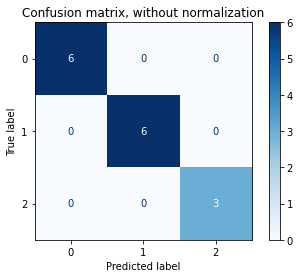

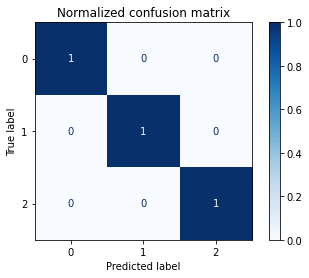

In [18]:
# calculate confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(trained_GB, x_val, y_pred_XGboost,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### for XGboost:

In [19]:
# calculate precision
precision_XGboost = precision_score(y_val, y_pred_XGboost, average='macro')

print(f"precision_XGboost: {precision_XGboost}")

precision_XGboost: 1.0


In [21]:
# calculate recall
recall_XGboost = recall_score(y_val, y_pred_XGboost, average='macro')


print(f"recall_XGboost: {recall_XGboost}")

recall_XGboost: 1.0


In [22]:
# calculate F1 score
f1_XGboost = f1_score(y_val, y_pred_XGboost, average='macro')

print(f"F1_XGboost: {f1_XGboost}")

F1_XGboost: 1.0


In [23]:
# calculate confusion matrix
cm_XGboost = confusion_matrix(y_val, y_pred_XGboost)

print(f"conf_mat_XGboost: {cm_XGboost}")

conf_mat_XGboost: [[6 0 0]
 [0 6 0]
 [0 0 3]]


### Compare Gradient Boost & XGboost Algorithm According to Evaluation Part Results:

Write your analysis here:

Both follows the principle of gradient boosting. There are however, the difference in modeling details. Specifically, XGboost used a more regularized model formalization to control over-fitting, which gives it better performance.
Here both of them performed well in terms of precision, but training time for XGboost is better than Gradient Boost(about 8 times better than Gradient Boost).